# Crypto Events Example

In [2]:
% reload_ext autoreload
% autoreload 2

UsageError: Line magic function `%` not found.


In [3]:
import os
import sys
import dotenv
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
from client.query_api_client import QuantNoteQueryApi
from template import quantnote_template # Import your template here

## Create api client

In [5]:
dotenv.load_dotenv(".env")
AUTH_TOKEN = os.getenv("AUTH_TOKEN")
client = QuantNoteQueryApi(auth_token=AUTH_TOKEN, api_version="v1")
client

# Getting upcoming events
Filter events for listing of new tokens.

In [6]:
query = """SELECT *
FROM studies.helixir.events
WHERE event_type = 'listing'
  and date_time >= now()
ORDER BY date_time
limit 5;"""

response1 = client.get_data_response(query)
response1

Waiting for response till limit:   0%|          | 0/600 [00:00<?, ?it/s]

,asset,date_time,event_type,sources,title
0,FIU,2023-03-10T00:00:00Z,listing,{https://coinmarketcal.com/en/},Bybit Delisting
1,DFL,2023-03-10T00:00:00Z,listing,{https://coinmarketcal.com/en/},Bybit Delisting
2,DRIV,2023-03-10T00:00:00Z,listing,{https://coinmarketcal.com/en/},Bybit Delisting
3,GAS,2023-03-10T00:00:00Z,listing,{https://coinmarketcal.com/en/},Bybit Delisting
4,NXD,2023-03-10T00:00:00Z,listing,{https://coinmarketcal.com/en/},Bybit Delisting


All upcoming crypto events

In [7]:
query = """SELECT *
FROM studies.helixir.events
WHERE date_time >= now()
ORDER BY date_time
limit 15;"""

response2 = client.get_data_response(query)
response2

Waiting for response till limit:   0%|          | 0/600 [00:00<?, ?it/s]

,asset,date_time,event_type,sources,title
0,-,2023-03-10T00:00:00Z,event,"{https://cointelegraph.com/,http://worlddigita...",World Digital Assets Investment Summit
1,BKN,2023-03-10T00:00:00Z,ico,"{https://icodrops.com/,https://icodrops.com/br...",Brickken
2,KRX,2023-03-10T00:00:00Z,other,{https://coinmarketcal.com/en/},KRYZA on CoinMarketCap
3,WBT,2023-03-10T00:00:00Z,ico,{https://coinmarketcal.com/en/},Rates Change
4,DOT,2023-03-10T00:00:00Z,other,{https://coinmarketcal.com/en/},Twitter Spaces
5,ADO,2023-03-10T00:00:00Z,other,{https://coinmarketcal.com/en/},February Review!
6,CRYPTO,2023-03-10T00:00:00Z,other,{https://coinmarketcal.com/en/},SXSW
7,LYXE,2023-03-10T00:00:00Z,other,{https://coinmarketcal.com/en/},SXSW
8,ADO,2023-03-10T00:00:00Z,other,{https://coinmarketcal.com/en/},AMA & Team Update
9,LCX,2023-03-10T00:00:00Z,other,{https://coinmarketcal.com/en/},Telegram AMA


# Example of historic event with price of token that has been listed

In [8]:
query = """SELECT *
FROM studies.helixir.events
WHERE event_type = 'listing'
  and date_time <= now()
ORDER BY date_time
limit 5;"""

response3 = client.get_data_response(query)
response3['date_time'] = pd.to_datetime(response3['date_time'])
response3

Waiting for response till limit:   0%|          | 0/600 [00:00<?, ?it/s]

,asset,date_time,event_type,sources,title
0,MAGIC,2023-01-17 00:00:00+00:00,listing,{https://coinmarketcal.com/en/},KuCoin Listing
1,FET,2023-01-17 00:00:00+00:00,listing,{https://coinmarketcal.com/en/},Bitrue Listing
2,KRRX,2023-01-17 00:00:00+00:00,listing,{https://coinmarketcal.com/en/},Huobi Global Listing
3,LDO,2023-01-17 00:00:00+00:00,listing,{https://coinmarketcal.com/en/},XT.COM Listing
4,DYDX,2023-01-17 00:00:00+00:00,listing,{https://coinmarketcal.com/en/},XT.COM Listing


Get first event for example

In [9]:
import datetime

asset = response3['asset'].iloc[0]
start_date = response3['date_time'].iloc[0]
end_date = start_date + datetime.timedelta(days=1)
event = response3['title'].iloc[0]

Get tokens with obtained asset ordered by market capitalization and select one with the highest one (that one is probably the one in the listing)

In [10]:
query = """SELECT mc.symbol, mc.price_stable, mc.market_cap, t.id, t.contract
from exchange.eth.raw.market_capitalizations mc join exchange.eth.raw.tokens t on token_id = t.id
where t.symbol = '{asset}' and t.active = true
order by market_cap desc;""".format(asset=asset)

response4 = client.get_data_response(query)
response4

Waiting for response till limit:   0%|          | 0/600 [00:00<?, ?it/s]

,contract,id,market_cap,price_stable,symbol
0,0xB0c7a3Ba49C7a6EaBa6cD4a96C55a1391070Ac9A,1480,442532959.20109564000000000000,1.30292606262355600376303636633721,MAGIC
1,0x2f25eA915811f23Be33e0910a2dc8Ff43E4Ce14A,493283,102188.34731915206000000000,0.00148099054085727620166077653548,MAGIC


In [11]:
token_id = response4['id'].iloc[0]
token_id

1480

In [12]:
tohlcv_query = """SELECT p.bucket as time, open_stable, high_stable, low_stable, close_stable, v.volume
FROM series.chain_eth.price_ticks_hourly p
         join series.chain_eth.volume_ticks_hourly v
              on (p.bucket = v.bucket and p.token_id = v.token_id and p.platform_id = v.platform_id)
WHERE p.token_id = {token_id}
  and p.platform_id = 1
  and p.bucket > timestamp '2023-01-15'
  and p.bucket < timestamp '2023-01-25'
ORDER BY time;""".format(token_id=token_id)

tohlcv_resp = client.get_data_response(tohlcv_query)
tohlcv_resp['time'] = pd.to_datetime(tohlcv_resp['time'])
tohlcv_resp.set_index('time')
tohlcv_resp['open_stable'] = pd.to_numeric(tohlcv_resp['open_stable'])
tohlcv_resp['high_stable'] = pd.to_numeric(tohlcv_resp['high_stable'])
tohlcv_resp['low_stable'] = pd.to_numeric(tohlcv_resp['low_stable'])
tohlcv_resp['close_stable'] = pd.to_numeric(tohlcv_resp['close_stable'])
tohlcv_resp

Waiting for response till limit:   0%|          | 0/600 [00:00<?, ?it/s]

,close_stable,high_stable,low_stable,open_stable,time,volume
0,0.654297,0.773438,0.633419,0.773438,2023-01-15 02:00:00+00:00,7891.3206454721834077
1,0.684442,0.727765,0.648281,0.690460,2023-01-15 03:00:00+00:00,4361.6983868668536599
2,0.704956,0.710734,0.704956,0.710734,2023-01-15 06:00:00+00:00,526.8392009074191326
3,0.718234,0.777733,0.710358,0.771819,2023-01-15 07:00:00+00:00,5419.9922230331779620
4,0.675618,0.675618,0.675618,0.675618,2023-01-15 09:00:00+00:00,772.19
...,...,...,...,...,...,...
130,1.172469,1.172469,1.172469,1.172469,2023-01-24 18:00:00+00:00,41.0470884389695947
131,1.179534,1.179534,1.179534,1.179534,2023-01-24 20:00:00+00:00,47.8711076763295878
132,1.117708,1.211504,1.117708,1.211504,2023-01-24 21:00:00+00:00,1490.0617388557426344
133,1.127829,1.127829,1.127829,1.127829,2023-01-24 22:00:00+00:00,105.1729564208951296


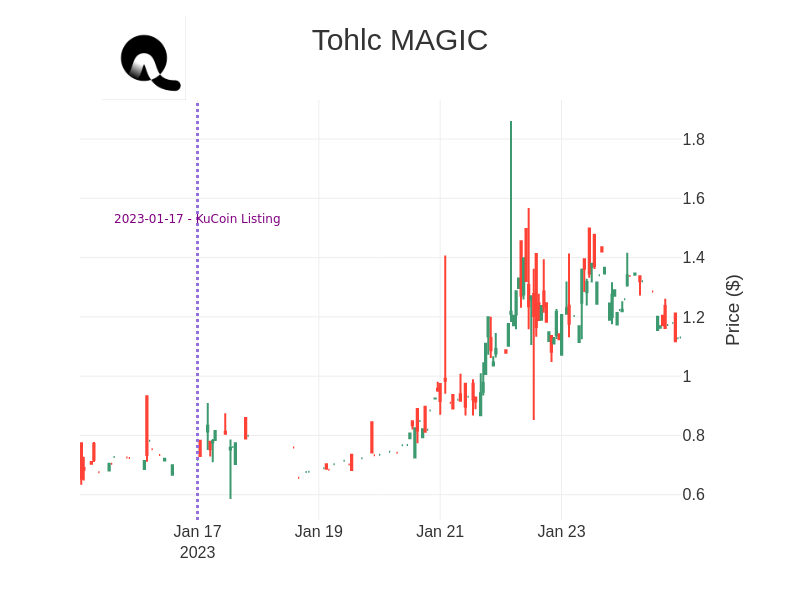

In [13]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

candlestick = go.Candlestick(
    x=tohlcv_resp['time'],
    open=tohlcv_resp['open_stable'],
    high=tohlcv_resp['high_stable'],
    low=tohlcv_resp['low_stable'],
    close=tohlcv_resp['close_stable'],
    name="Price"
)

fig.add_trace(candlestick, secondary_y=True)
fig.add_vrect(
    x0=start_date, x1=end_date,
    fillcolor='purple', opacity=0.2,
    layer="below", line_width=0, name="event")
fig.update_layout(
    width=800, height=600,
    title="Tohlc {asset}".format(asset=asset),
    xaxis_rangeslider_visible=False,
    shapes=
    [dict(type='line',
          yref='paper', y0=0, y1=1,
          x0=start_date, x1=start_date,
          line=dict(color="MediumPurple",
                    width=3,
                    dash="dot")
          )
     ],
    template='quantnote'
)
fig.add_annotation(
    x=start_date
    , text='{date} - {event}'.format(date=start_date.strftime("%Y-%m-%d"), event=event)
    , yanchor='bottom'
    , showarrow=False
    , arrowhead=1
    , arrowsize=1
    , arrowwidth=2
    , arrowcolor="#636363"
    , ax=-20
    , ay=-30
    , font=dict(size=12, color="purple", family="Sans Serif")
    , align="left"
    ,)

# Set y-axes titles
fig.update_yaxes(title_text="Price ($)", secondary_y=True)

fig.show("png")